In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_palette('mako_r')

In [3]:
df = pd.read_csv('data/kc_house_data_cleaned.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0


In [4]:
df.shape

(17912, 21)

## Baseline model

_A baseline is the result of a very basic model with no feature engineering / Trasnformation/ Data Modification. You generally create a baseline model and then try to make more complex solutions in order to get a better result._

So let's go ahead and see how our model performs withhout making any changes and running the model with the data as it was given. to do so we will remove `basement` and `renovated` column beacuse they were not present initially in the dataset.

In [7]:
def run_model(features, target, features_not_to_use=[]):
    
    X = features.drop(features_not_to_use, axis=1)
    y = target

    model = sm.OLS(y, sm.add_constant(X)).fit()
    return model

In [8]:
features_basline = df.drop(columns=['price','basement','renovated'], axis=1)

X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(features_basline, df['price'], random_state=55, test_size=0.2)
model = run_model(X_train_baseline, y_train_baseline)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1879.
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        15:17:08   Log-Likelihood:            -1.8677e+05
No. Observations:               14329   AIC:                         3.736e+05
Df Residuals:                   14311   BIC:                         3.737e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.699e+05   2.01e+06     -0.234      0.815   -4.41e+06    3.47e+06
bedrooms      -1.012e+04   1426.778     -7.090      0.000   -1.29e+04   -7319.298
bathrooms      1.752e+04   2333.020      7.511      0.000     1.3e+04    2.21e+04
sqft_living      58.5103      1.923     30.427      0.000      54.741      62.280
sqft_lot         -4.4680      0.456     -9.801      0.000      -5.362      -3.574
floors         1.603e+04   2741.946      5.845      0.000    1.07e+04    2.14e+04
waterfront     1.728e+05   2.41e+04      7.172      0.000    1.26e+05     2.2e+05
view           3.285e+04   1763.737     18.626      0.000    2.94e+04    3.63e+04
condition      2.721e+04   1603.660     16.965      0.000    2.41e+04    3.03e+04
grade          7.574e+04   1565.234     48.391      0.000    7.27e+04    7.88e+04
sqft_above       30.3318      1.861     16.299      0.000      26.684      33.980
sqft_basement    28.1786      2.143     13.149      0.000      23.978      32.379
yr_built      -1888.7068     49.642    -38.047      0.000   -1986.011   -1791.402
yr_renovated     15.9665      2.691      5.932      0.000      10.691      21.242
zipcode        -249.1226     22.476    -11.084      0.000    -293.179    -205.066
lat            5.481e+05   7300.631     75.081      0.000    5.34e+05    5.62e+05
long          -1.732e+04   9392.848     -1.844      0.065   -3.57e+04    1092.958
sqft_living15    50.6980      2.752     18.424      0.000      45.304      56.092
sqft_lot15       -2.1885      0.402     -5.440      0.000      -2.977      -1.400
==============================================================================
Omnibus:                     1289.092   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2295.186
Skew:                           0.636   Prob(JB):                         0.00
Kurtosis:                       4.492   Cond. No.                     1.01e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
basline_lrm = LinearRegression()
basline_lrm.fit(X_train_baseline,y_train_baseline)

LinearRegression()

In [10]:
y_predict_baseline = basline_lrm.predict(X_test_baseline)

In [11]:
baseline_r_sqr_train = basline_lrm.score(X_train_baseline, y_train_baseline)
baseline_r_sqr_test = basline_lrm.score(X_test_baseline, y_test_baseline)

print(f"R square of TRAIN = {baseline_r_sqr_train} \nR square of TEST = {baseline_r_sqr_test}")

R square of TRAIN = 0.6906526330685954 
R square of TEST = 0.6831330429678844


In [12]:
baseline_rmse_train = np.sqrt(mean_squared_error(y_test_baseline, y_predict_baseline))
print(f"RMSE of TRAIN = {baseline_rmse_train}")

RMSE of TRAIN = 110943.25185779204


### Checking the assumptions

#### 1. Linearity

<Figure size 2500x800 with 0 Axes>

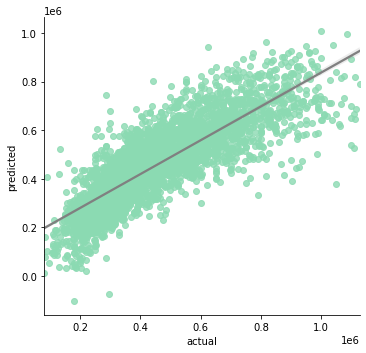

In [42]:
actual_predict = pd.DataFrame(data=[y_predict_baseline, y_test_baseline], index=['predicted','actual']).T

fig = plt.figure(figsize=(25,8),dpi=100)
sns.lmplot(x='actual', y='predicted',data=actual_predict, fit_reg=True,line_kws={'color': 'grey'})

#### Observation 
---
    - There seems to be a linear relation.

#### 2. Normality of residuals

In [14]:
residuals = y_test_baseline - y_predict_baseline

<AxesSubplot:ylabel='Density'>

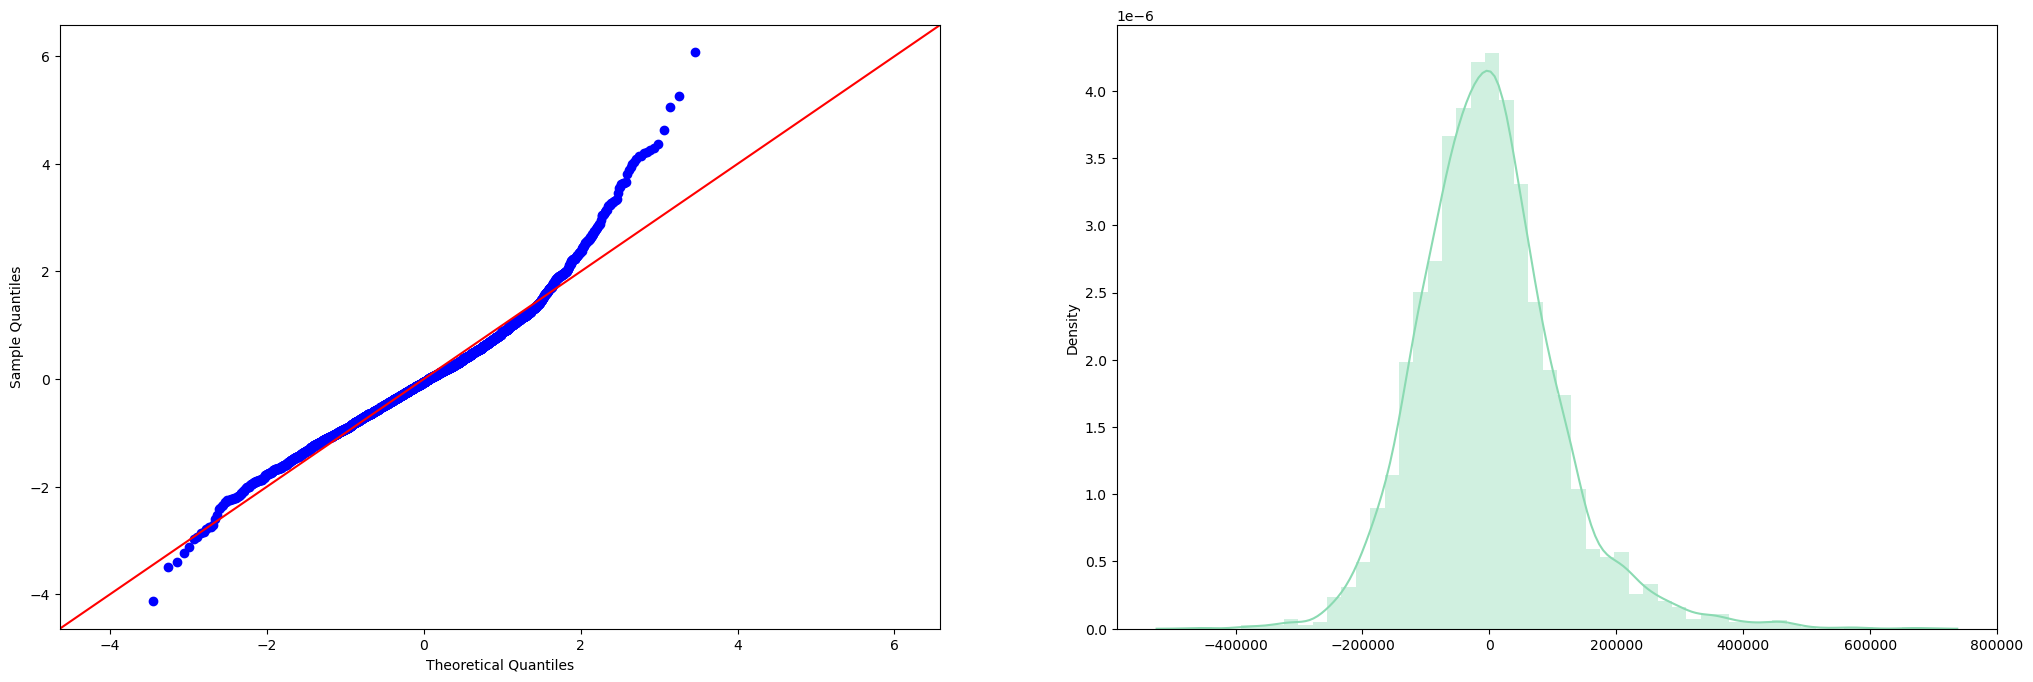

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25,8),dpi=100)

axes = axes.flatten()
sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45', ax=axes[0])
sns.distplot(x=residuals, ax=axes[1])

In [52]:
p_value = shapiro(residuals)
p_value

ShapiroResult(statistic=0.9685307145118713, pvalue=2.474773371032944e-27)

#### Observation 
---
    - QQ-plot and Histogram shows that it is normally distributed and also we failed to reject null hypothesis based on p value using shapiro.

#### 3. No Multicollinearity

In [32]:
data_corr = X_train_baseline.corr()

<AxesSubplot:>

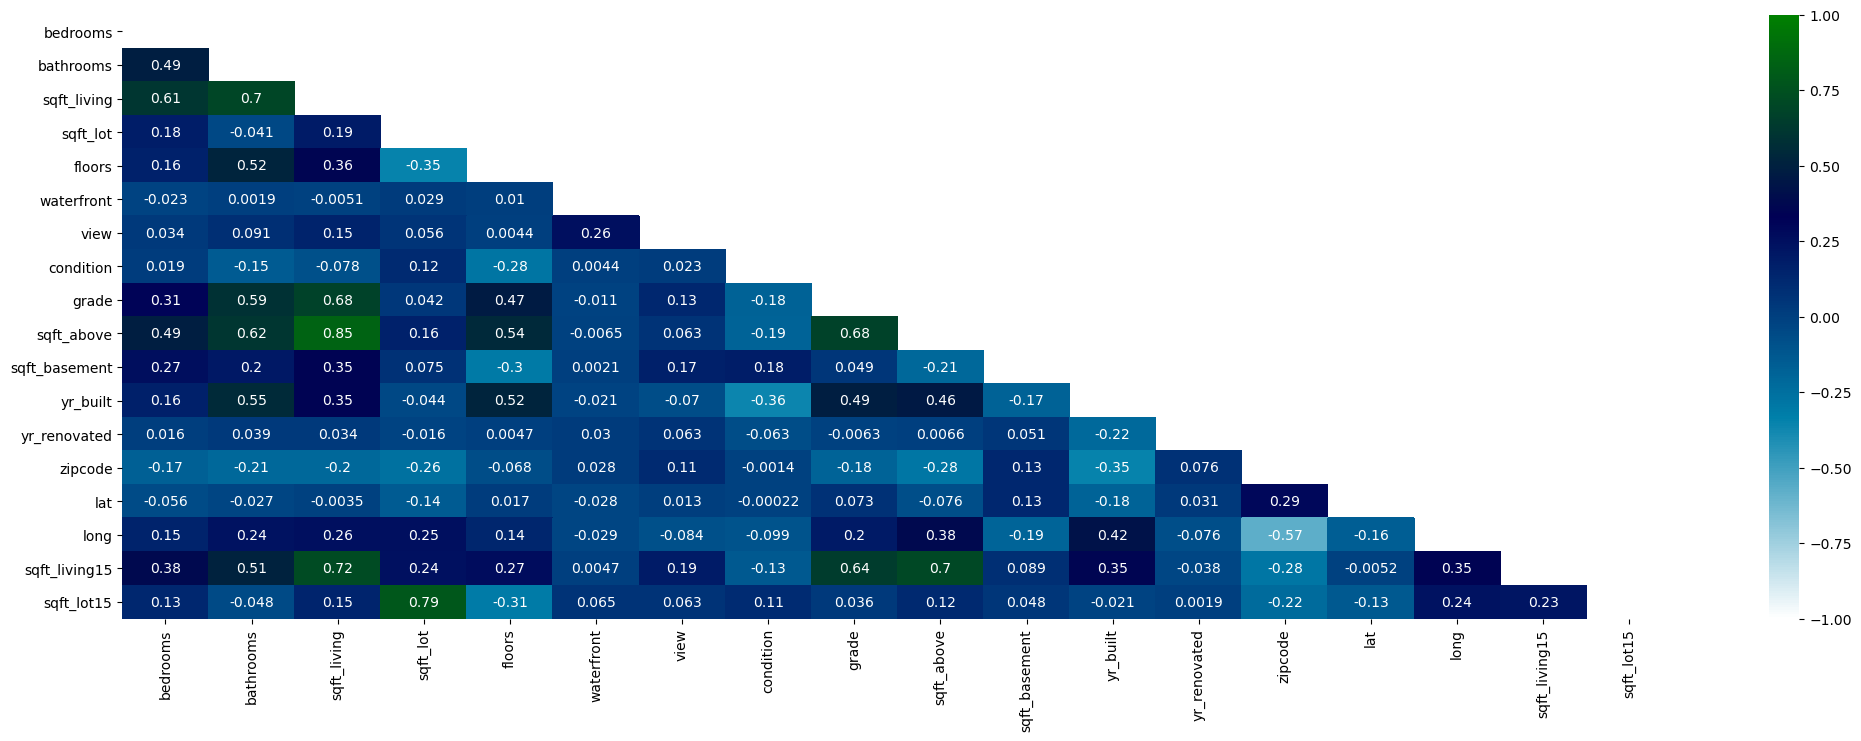

In [34]:
plt.figure(figsize=(25,8),dpi=100)
mask = np.triu(np.ones_like(data_corr, dtype=np.int))
sns.heatmap(data_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='ocean_r')

#### Observation 
---
    - sqft_living and sqft_above are highly correlated.
    - sqft_basement and basement are highly correlated.
    - sqft_above, sqft_living vs grade needs investigating as they are correlated and relation between sqft and grading of house does not fit right.

#### 4. Homoscedasticity

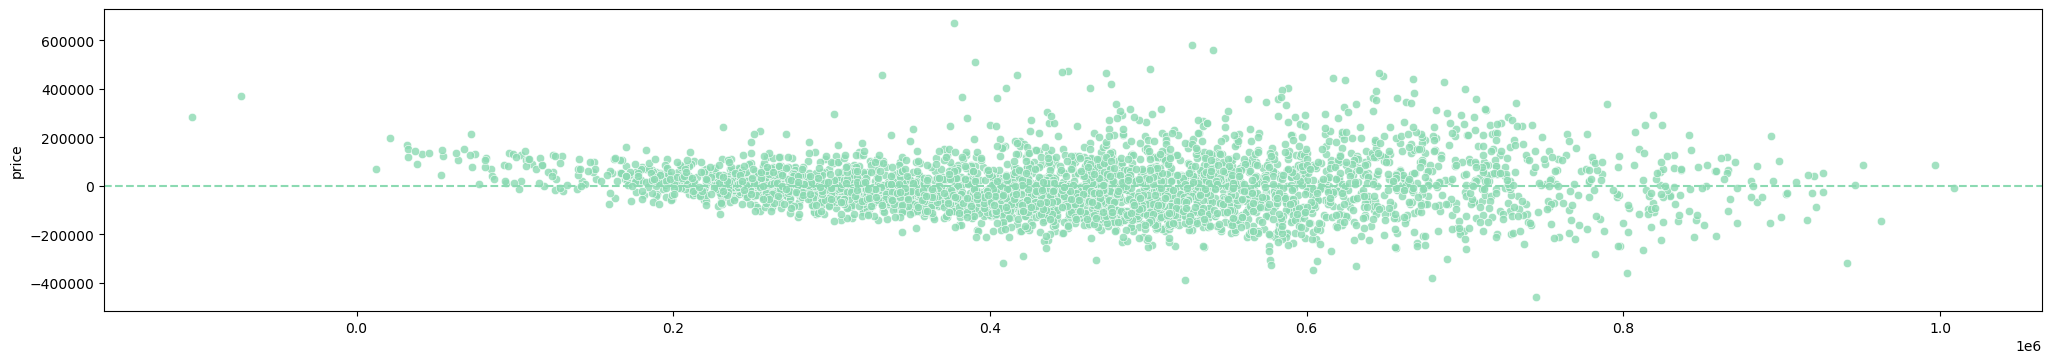

In [51]:
fig = plt.figure(figsize=(25,4),dpi=100)
sns.scatterplot(x=y_predict_baseline, y=residuals, alpha=0.8)
plt.axhline(0, ls='--')

#### Observation 
---
    - seems to be fulfill Homoscedasticity.